In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from util.model_eval import predict_and_score

In [38]:
xgb_model = joblib.load("models/xgboost/xbg_model.joblib")
xgb_test_features = joblib.load("models/xgboost/test_features.joblib")
xgb_test_targets = joblib.load("models/xgboost/test_targets.joblib")

xgb_report, xgb_roc_auc = predict_and_score(
    xgb_model, xgb_test_features, xgb_test_targets
)


Classification Report:
{'0': {'precision': 0.8570861452957523, 'recall': 0.9174220963172804, 'f1-score': 0.8862283642334269, 'support': 7060.0}, '1': {'precision': 0.5959805959805959, 'recall': 0.44329896907216493, 'f1-score': 0.5084244753177652, 'support': 1940.0}, 'accuracy': 0.8152222222222222, 'macro avg': {'precision': 0.7265333706381741, 'recall': 0.6803605326947226, 'f1-score': 0.6973264197755961, 'support': 9000.0}, 'weighted avg': {'precision': 0.8008033935544853, 'recall': 0.8152222222222222, 'f1-score': 0.804790637067162, 'support': 9000.0}}
ROC-AUC Score: 0.7682076312023598


In [39]:
nb = joblib.load("models/naive_bayes/naive_bayes_ensemble.joblib")
nb_test_features = joblib.load("models/naive_bayes/test_features.joblib")
nb_test_targets = joblib.load("models/naive_bayes/test_targets.joblib")

nb_report, nb_roc_auc = predict_and_score(nb, nb_test_features, nb_test_targets)


Classification Report:
{'0': {'precision': 0.8381151434543036, 'recall': 0.9411137187966716, 'f1-score': 0.8866331658291458, 'support': 4687.0}, '1': {'precision': 0.6255088195386703, 'recall': 0.3511043412033511, 'f1-score': 0.4497560975609756, 'support': 1313.0}, 'accuracy': 0.812, 'macro avg': {'precision': 0.731811981496487, 'recall': 0.6461090300000114, 'f1-score': 0.6681946316950607, 'support': 6000.0}, 'weighted avg': {'precision': 0.7915897929040991, 'recall': 0.812, 'f1-score': 0.7910299007231278, 'support': 6000.0}}
ROC-AUC Score: 0.7101196760302312


In [40]:
ann_report = joblib.load("models/ann/ann_report.joblib")
ann_roc_auc = joblib.load("models/ann/ann_roc_auc.joblib")
ann_report, ann_roc_auc

({'0': {'precision': 0.8749106504646176,
   'recall': 0.7857907126043226,
   'f1-score': 0.8279594137542277,
   'support': 4673},
  '1': {'precision': 0.44481419855795895,
   'recall': 0.6043707611152976,
   'f1-score': 0.5124600638977637,
   'support': 1327},
  'accuracy': 0.7456666666666667,
  'macro avg': {'precision': 0.6598624245112883,
   'recall': 0.6950807368598102,
   'f1-score': 0.6702097388259957,
   'support': 6000},
  'weighted avg': {'precision': 0.7797876518512615,
   'recall': 0.7456666666666667,
   'f1-score': 0.758181474210973,
   'support': 6000}},
 0.753706496829338)

In [41]:
metrics = ["precision", "recall", "f1-score"]
classes = ["0", "1"]
comparison_data = []

for cls in classes:
    for metric in metrics:
        comparison_data.append(
            {
                "Model": "xgboost",
                "Class": cls,
                "Metric": metric,
                "Value": xgb_report[cls][metric],
            }
        )
        comparison_data.append(
            {
                "Model": "ann",
                "Class": cls,
                "Metric": metric,
                "Value": ann_report[cls][metric],
            }
        )
        comparison_data.append(
            {
                "Model": "naive bayes",
                "Class": cls,
                "Metric": metric,
                "Value": nb_report[cls][metric],
            }
        )

df = pd.DataFrame(comparison_data)

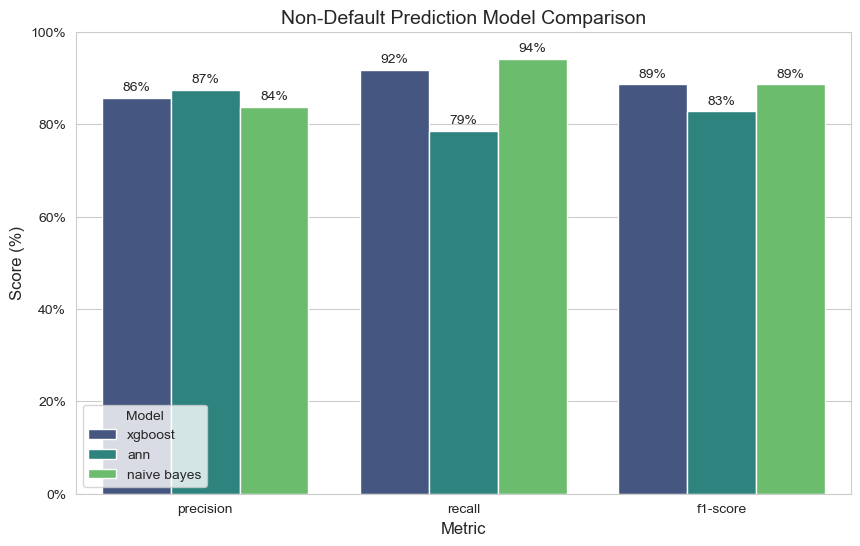

In [42]:
# Prepare data for combined comparison for each class
class_0_data = df[df["Class"] == "0"]
class_1_data = df[df["Class"] == "1"]

sns.set_style("whitegrid")
sns.set_palette("husl")

# Model comparison for Non-Default class
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=class_0_data, x="Metric", y="Value", hue="Model", palette="viridis"
)
plt.title("Non-Default Prediction Model Comparison", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score (%)", fontsize=12)
plt.legend(title="Model")

# Format y-tick labels as percentages
plt.yticks(
    ticks=plt.yticks()[0], labels=[f"{int(tick * 100)}%" for tick in plt.yticks()[0]]
)

# Add bar labels as percentages
for container in bar_plot.containers:
    bar_plot.bar_label(
        container,
        fmt="%.0f%%",
        padding=3,
        labels=[f"{v * 100:.0f}%" for v in container.datavalues],
    )

plt.show()

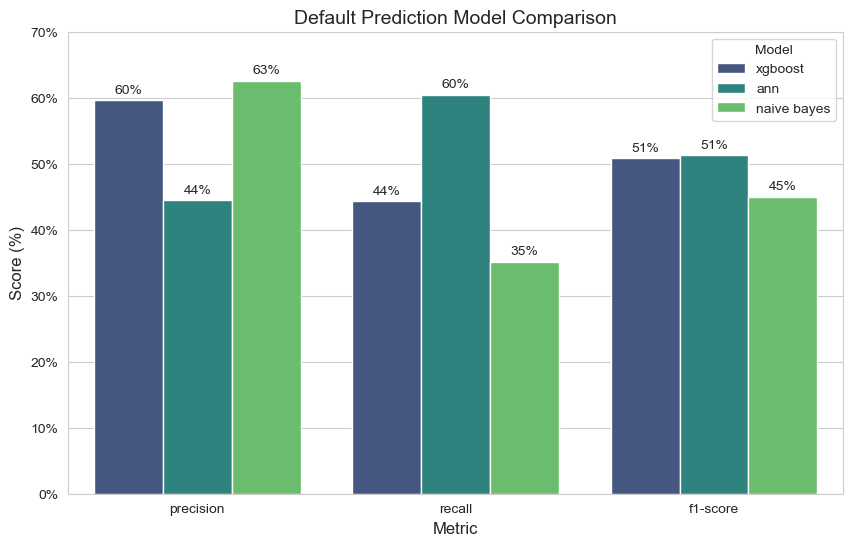

In [43]:
# Model comparison for Default class
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=class_1_data, x="Metric", y="Value", hue="Model", palette="viridis"
)
plt.title("Default Prediction Model Comparison", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score (%)", fontsize=12)
plt.legend(title="Model")

# Format y-tick labels as percentages
plt.yticks(
    ticks=plt.yticks()[0], labels=[f"{int(tick * 100)}%" for tick in plt.yticks()[0]]
)

# Add bar labels as percentages
for container in bar_plot.containers:
    bar_plot.bar_label(
        container,
        fmt="%.0f%%",
        padding=3,
        labels=[f"{v * 100:.0f}%" for v in container.datavalues],
    )

plt.show()

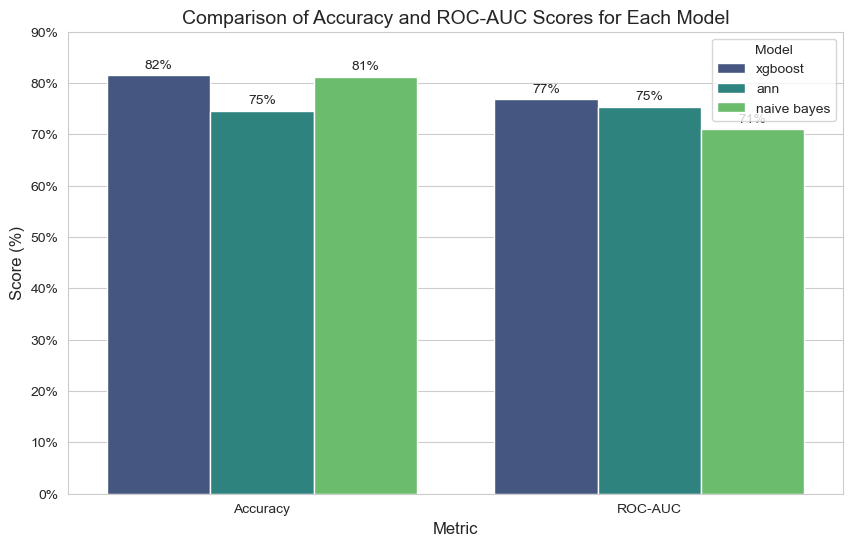

In [47]:
# Prepare data for accuracy and ROC-AUC comparison
accuracy_roc_data = pd.DataFrame(
    {
        "Metric": ["Accuracy", "ROC-AUC"],
        "xgboost": [xgb_report["accuracy"], xgb_roc_auc],
        "ann": [ann_report["accuracy"], ann_roc_auc],
        "naive bayes": [nb_report["accuracy"], nb_roc_auc],
    }
).melt(id_vars="Metric", var_name="Model", value_name="Score")

# Plot the comparison chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=accuracy_roc_data, x="Metric", y="Score", hue="Model", palette="viridis"
)
plt.title("Comparison of Accuracy and ROC-AUC Scores for Each Model", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score (%)", fontsize=12)
plt.legend(title="Model")

# Format y-tick labels as percentages
plt.yticks(
    ticks=plt.yticks()[0], labels=[f"{int(tick * 100)}%" for tick in plt.yticks()[0]]
)

# Add bar labels as percentages
for container in bar_plot.containers:
    bar_plot.bar_label(
        container,
        fmt="%.0f%%",
        padding=3,
        labels=[f"{v * 100:.0f}%" for v in container.datavalues],
    )

plt.show()